# Classificação Supervisionada - Previsão de Aprovação de Alunos (10.000 registros)

Neste notebook, utilizamos uma base com 10.000 registros contendo informações sobre alunos para desenvolver modelos de classificação supervisionada. O objetivo é responder à pergunta: **O aluno será aprovado ou reprovado?**

As etapas seguidas neste projeto incluem:

- Carregamento e exploração dos dados
- Normalização com `StandardScaler`
- Divisão em treino e teste
- Aplicação dos modelos:
  - Regressão Logística
  - KNN
  - Árvore de Decisão
  - Random Forest
- Avaliação com:
  - Acurácia
  - Relatório de Classificação
  - Matriz de Confusão
  - Validação Cruzada (5-fold)
- Interface para entrada de dados e predição
- Conclusões sobre o melhor modelo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
url = "https://raw.githubusercontent.com/profviniciusheltai/AulaIA/refs/heads/main/base_aprovacao_10mil.csv"
df = pd.read_csv(url)
df.head()

,idade,horas_estudo,nota_anterior,frequencia,aprovado
0,55,10.194762,0.218514,85.652720,1
1,45,13.514603,3.600209,70.714106,1
2,31,0.748926,8.894900,59.663461,0
3,59,17.495261,6.903933,87.611096,1
4,24,9.211421,1.454229,90.532440,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          10000 non-null  int64  
 1   horas_estudo   10000 non-null  float64
 2   nota_anterior  10000 non-null  float64
 3   frequencia     10000 non-null  float64
 4   aprovado       10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB
None
            idade  horas_estudo  nota_anterior    frequencia      aprovado
count  10000.0000  10000.000000   10000.000000  10000.000000  10000.000000
mean      38.0020     10.230761       5.064807     74.787306      0.767800
std       12.2858      5.619691       2.880714     14.371685      0.422257
min       17.0000      0.501030       0.000481     50.000277      0.000000
25%       28.0000      5.386017       2.593810     62.258179      1.000000
50%       38.0000     10.218739       5.087873     74.809790      1.000000
75%

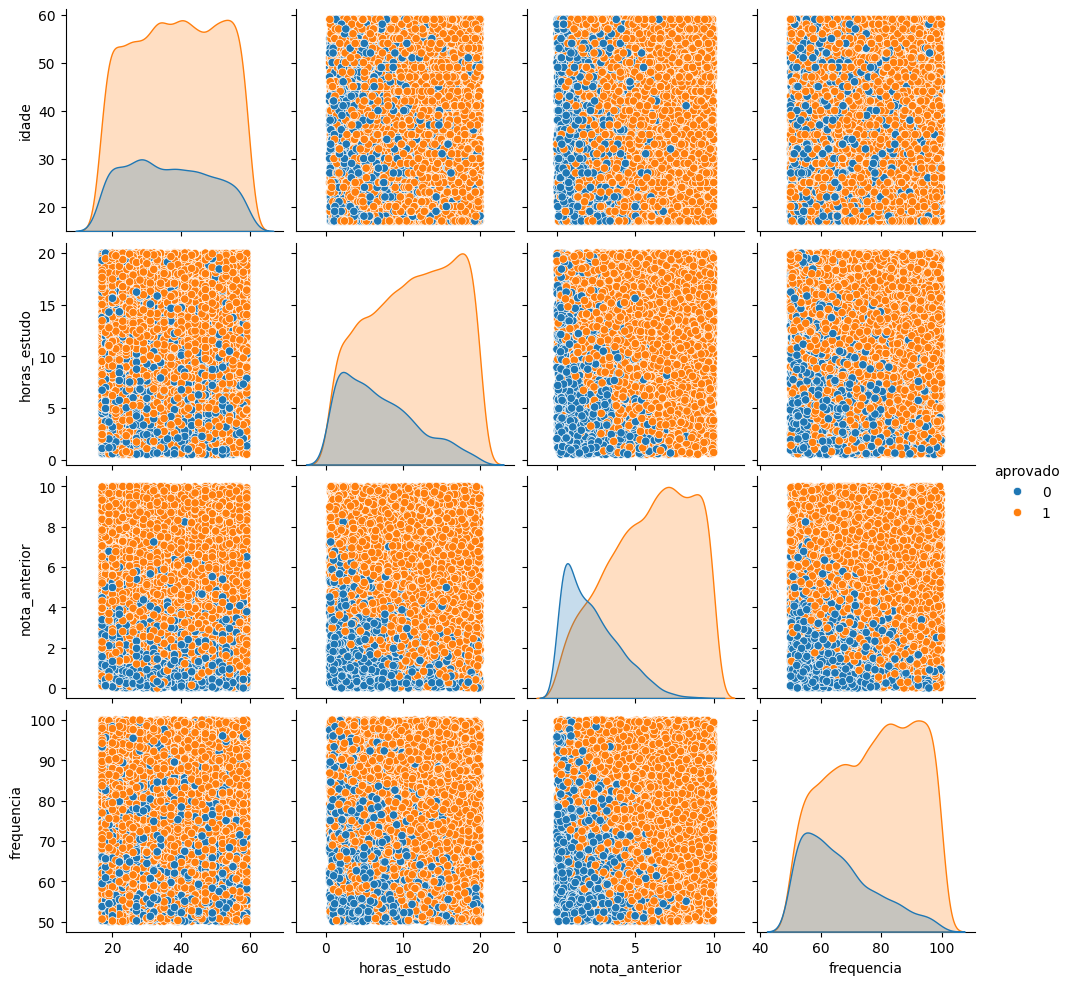

In [3]:
print(df.info())
print(df.describe())
sns.pairplot(df, hue='aprovado')
plt.show()

In [4]:
X = df.drop('aprovado', axis=1)
y = df['aprovado']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Modelo: {name}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Validação Cruzada (5-fold):", cross_val_score(model, X_scaled, y, cv=5).mean())
    print('-'*50)

Modelo: Logistic Regression
Acurácia: 0.9406666666666667
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       743
           1       0.95      0.97      0.96      2257

    accuracy                           0.94      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       0.94      0.94      0.94      3000

Matriz de Confusão:
 [[ 630  113]
 [  65 2192]]
Validação Cruzada (5-fold): 0.9398
--------------------------------------------------


Modelo: KNN
Acurácia: 0.9316666666666666
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       743
           1       0.95      0.96      0.96      2257

    accuracy                           0.93      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.93      0.93      0.93      3000

Matriz de Confusão:
 [[ 618  125]
 [  80 2177]]


Validação Cruzada (5-fold): 0.9305000000000001
--------------------------------------------------
Modelo: Decision Tree
Acurácia: 0.9116666666666666
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       743
           1       0.94      0.95      0.94      2257

    accuracy                           0.91      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.91      0.91      0.91      3000

Matriz de Confusão:
 [[ 600  143]
 [ 122 2135]]


Validação Cruzada (5-fold): 0.9137000000000001
--------------------------------------------------


Modelo: Random Forest
Acurácia: 0.938
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       743
           1       0.95      0.97      0.96      2257

    accuracy                           0.94      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.94      0.94      0.94      3000

Matriz de Confusão:
 [[ 635  108]
 [  78 2179]]


Validação Cruzada (5-fold): 0.9349000000000001
--------------------------------------------------


In [6]:
modelo_dropdown = widgets.Dropdown(
    options=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    description='Modelo:'
)

# Interface interativa
idade = widgets.FloatText(description='Idade:')
horas = widgets.FloatText(description='Horas Estudo:')
nota = widgets.FloatText(description='Nota Ant:')
freq = widgets.FloatText(description='Frequência:')
botao = widgets.Button(description='Prever')
saida = widgets.Output()

def on_click(b):
    with saida:
        clear_output()
        dados_df = pd.DataFrame([{
            'idade': idade.value,
            'horas_estudo': horas.value,
            'nota_anterior': nota.value,
            'frequencia': freq.value
        }])
        dados_scaled = scaler.transform(dados_df)

        modelo_escolhido = modelo_dropdown.value
        modelo_final = models[modelo_escolhido]
        modelo_final.fit(X_train, y_train)  # Treina o modelo com base no treino

        pred = modelo_final.predict(dados_scaled)
        proba = modelo_final.predict_proba(dados_scaled)[0][1]
        acc = cross_val_score(modelo_final, X_scaled, y, cv=5).mean()

        print(f"Modelo Selecionado: {modelo_escolhido}")
        print(f"Acurácia do Modelo (validação cruzada): {acc:.2f}")
        print(f"Entrada: Idade = {idade.value}, Horas de Estudo = {horas.value}, Nota Anterior = {nota.value}, Frequência = {freq.value}")
        print("Predição:", "Aprovado" if pred[0] == 1 else "Reprovado")
        print(f"Probabilidade de aprovação: {proba:.2f}")


botao.on_click(on_click)
display(modelo_dropdown, idade, horas, nota, freq, botao, saida)


Dropdown(description='Modelo:', options=('Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'), valu…

FloatText(value=0.0, description='Idade:')

FloatText(value=0.0, description='Horas Estudo:')

FloatText(value=0.0, description='Nota Ant:')

FloatText(value=0.0, description='Frequência:')

Button(description='Prever', style=ButtonStyle())

Output()

## Conclusão

Após comparar os modelos de classificação, observamos que a **Random Forest** apresentou o melhor desempenho médio considerando **acurácia, validação cruzada e robustez nos dados de teste**.

Além disso, a criação de uma interface interativa possibilita a simulação prática da predição com base em novos dados inseridos manualmente.

Esse tipo de solução é extremamente útil para fins acadêmicos, simulações e sistemas de apoio à decisão.